### Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


#### HR Analytics

It is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment

It deals with gathering data on employee efficiency and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

#### How does Attrition affect companies? 

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### Objective: To use HR Analytics in analyzing attrition

### Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip


### Understand the Dataset

In [518]:
# Importing libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [519]:
# Read the data set
os.chdir("F:\FlipRobo\Project Evaluation\HR Attrition")
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [520]:
# Shape of the dataset
df.shape

(1470, 35)

#### Observation: There are 1470 rows, and 35 columns.

In [521]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### Observation: EmployeeCount, Over18, StandardHours have only one unique value. They canbe safely dropped as they are constant.

### Dropping variables: EmployeeCount, Over18, StandardHours from the dataset

In [522]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'],inplace=True)

In [595]:
df.shape

(1470, 32)

#### Observation: The number of columns reduced to 32 after dropping the variables 'EmployeeCount', 'Over18',and 'StandardHours'.

In [523]:
# Check  data type of variables
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [524]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [525]:
# Numerical variables
Numerical=['Age','DailyRate',
       'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction','HourlyRate',
       'JobInvolvement', 'JobLevel','JobSatisfaction',
      'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

# Categorical variables
Categorical=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime']

#### Observation: Among the 32 variables, there are 24 numerical and 8 categorical.          

## Exploratory data analysis

### (i) Check for Missing Values:

In [526]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Observation: There are no MISSING values.

### (ii) Explore Data Distribution
Visualize the distribution of numerical variables using histograms or kernel density plots.
Check for skewness and outliers in numerical variables.
Explore the distribution of categorical variables using countplots.

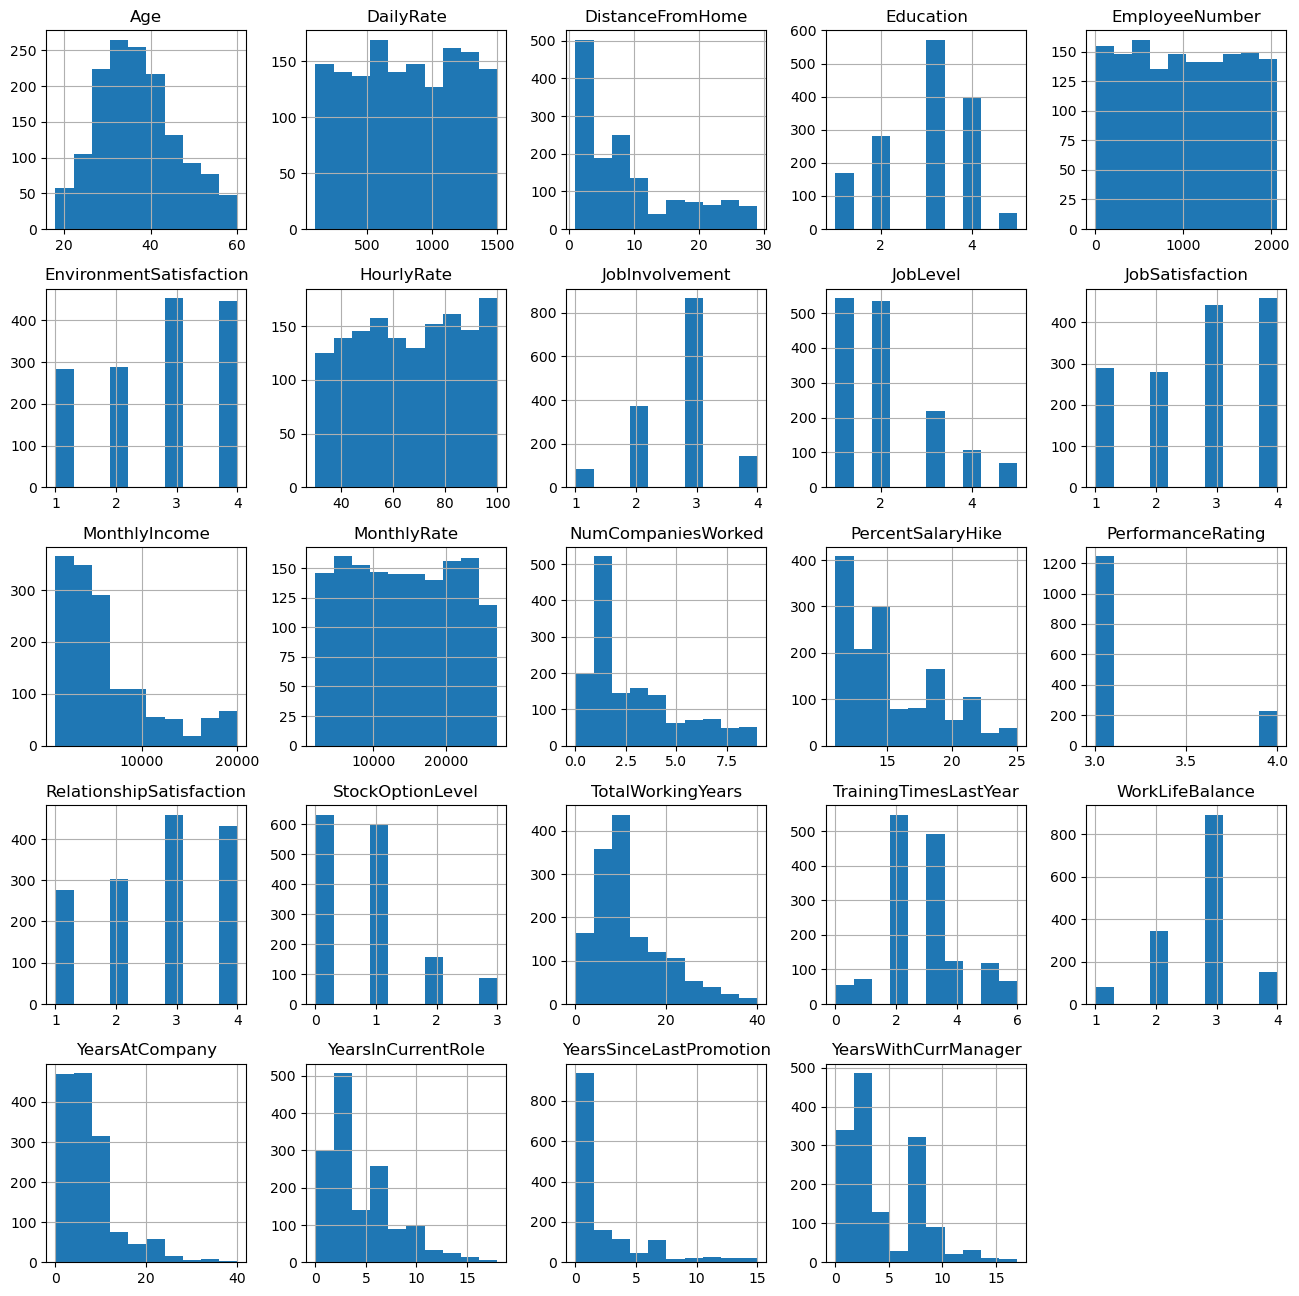

In [527]:
# Histogram for numerical variables
df[Numerical].hist(figsize=(16,16))
plt.show()

In [528]:
df[Numerical].nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

#### Observation: Among the 24 numerical variables 9 are discrete and 15 are continuous numerical variables. These are respectively: 

#### Numerical_discrete=['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']    

#### Numerical_continuous=['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

#### To check skewness of the continuous variables

In [529]:
# skewness of the continuous numerical variables
Numerical_continuous=['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
       
df[Numerical_continuous].skew()       

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
EmployeeNumber             0.016574
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

#### Observation: DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears,YearsAtCompany,YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager have high skewness (>0.7)     

#### Box cox transformation: To reduce skewness of the highly skewed variables

In [530]:
from scipy.stats import boxcox
X=pd.DataFrame()
for i in ['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:
    transformed_data, lambda_value = boxcox(df[i]+0.01) 
    X[i]=transformed_data
    sk1=pd.Series(X[i]).skew()
    print(f'{i} = {sk1:.2f}')

DistanceFromHome = -0.06
MonthlyIncome = 0.03
NumCompaniesWorked = -0.24
PercentSalaryHike = 0.11
TotalWorkingYears = 0.00
YearsAtCompany = 0.01
YearsInCurrentRole = -0.42
YearsSinceLastPromotion = -0.13
YearsWithCurrManager = -0.45


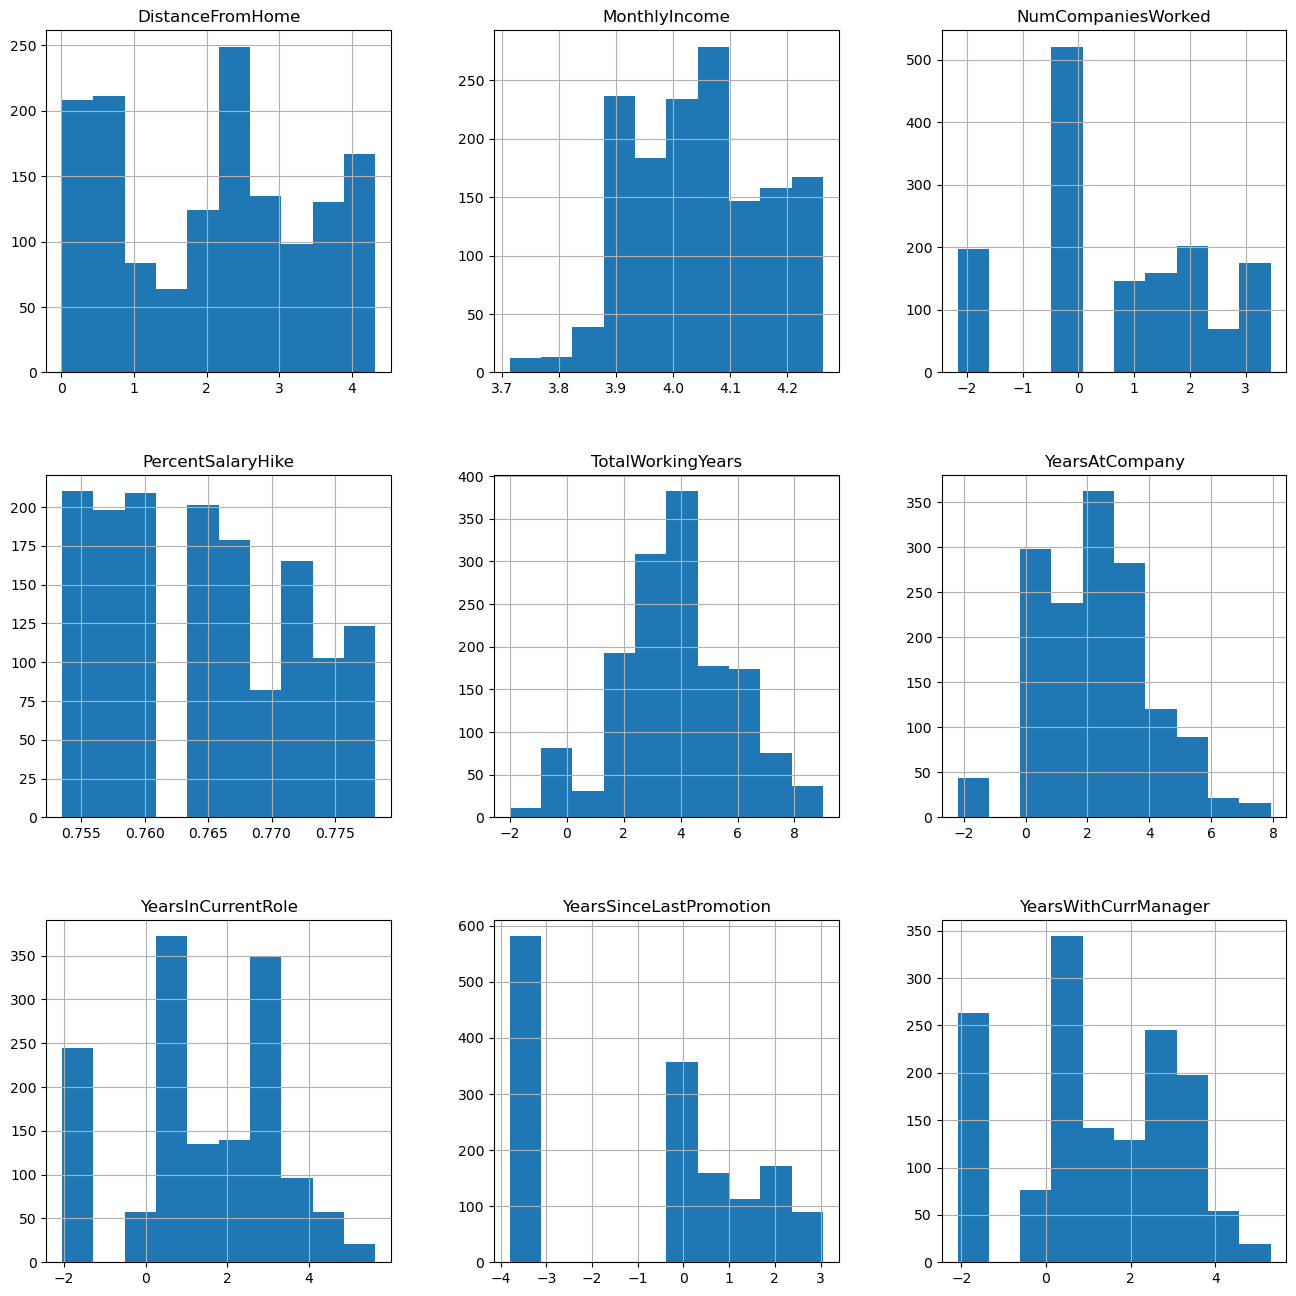

In [531]:
X[['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].hist(figsize=(16,16))
plt.show()

#### Observation: Clearly, the skewness of the variables after Box cox transformation has considerably reduced.

### Replacing the highly skewed variables by the corresponding transformed variables

In [532]:
df1=df.drop(columns=['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],inplace=False)
df2=pd.concat([df1,X],axis=1)
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,2,Life Sciences,1,2,Female,...,1,0.009957,4.080011,3.178760,0.753480,3.357805,2.551431,1.882352,-3.799740,2.272299
1,49,No,Travel_Frequently,279,Research & Development,1,Life Sciences,2,3,Male,...,3,2.420497,4.053053,0.009969,0.776661,3.928134,3.647236,3.006162,0.009955,2.962909
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,3,0.733890,3.879542,2.576201,0.765874,3.041735,-2.201738,-2.044086,-3.799740,-2.087981
3,33,No,Travel_Frequently,1392,Research & Development,4,Life Sciences,5,4,Female,...,3,1.192776,3.947144,0.009969,0.753480,3.357805,3.142771,3.006162,1.156069,-2.087981
4,27,No,Travel_Rarely,591,Research & Development,1,Medical,7,1,Male,...,3,0.733890,3.981273,3.445265,0.757459,2.698690,0.797313,0.810609,0.719607,0.806720


In [533]:
# Skewness after transformation
df2[['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()

DistanceFromHome          -0.059332
MonthlyIncome              0.032788
NumCompaniesWorked        -0.241150
PercentSalaryHike          0.111524
TotalWorkingYears          0.002736
YearsAtCompany             0.010052
YearsInCurrentRole        -0.423218
YearsSinceLastPromotion   -0.133212
YearsWithCurrManager      -0.445175
dtype: float64

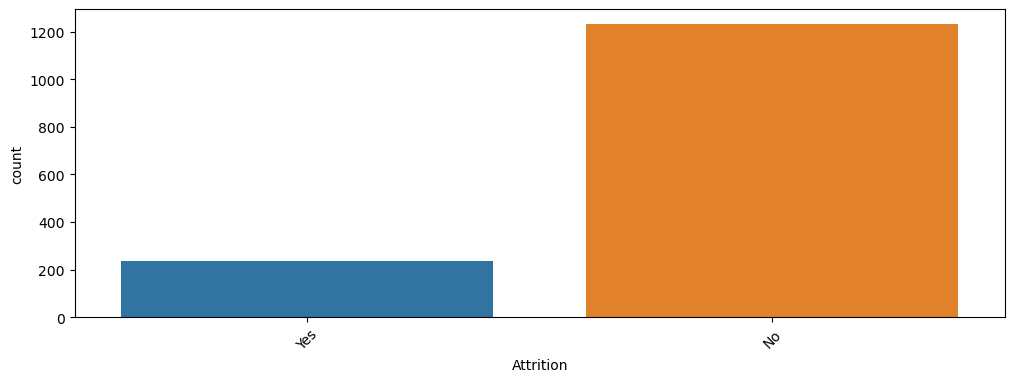

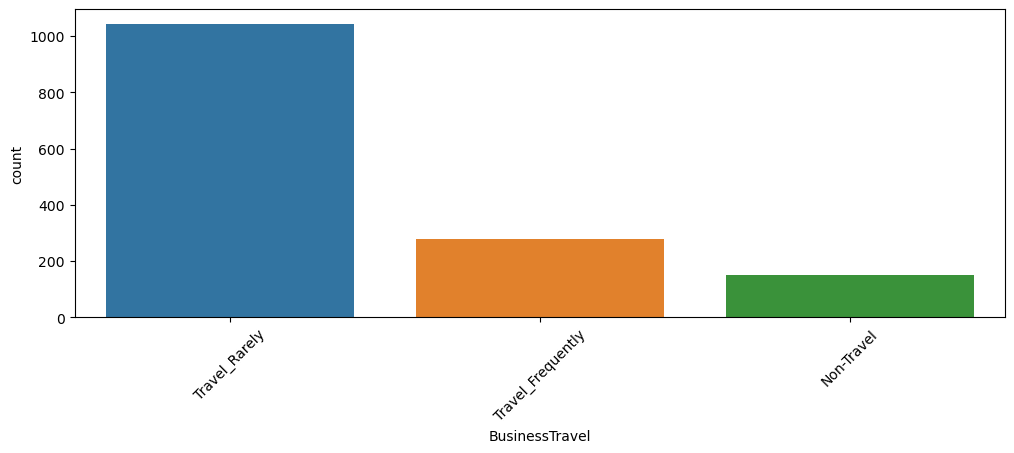

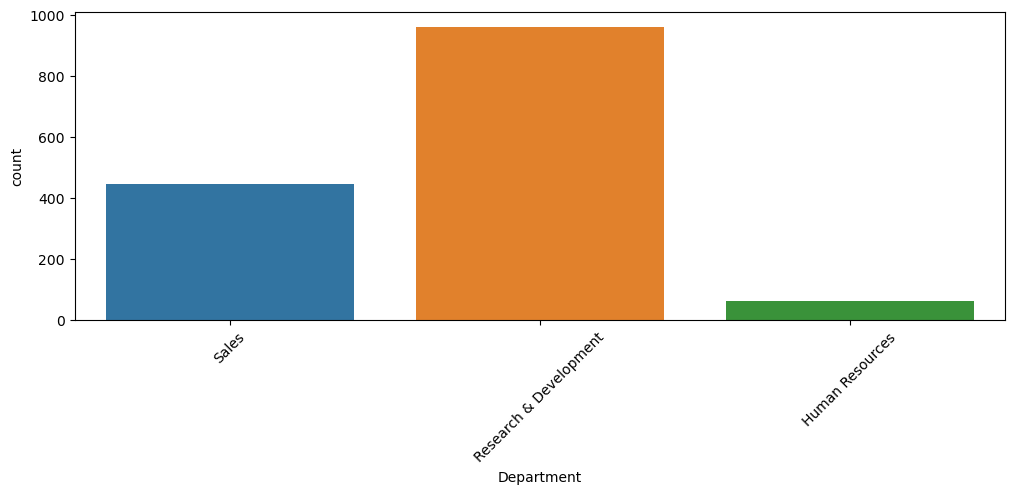

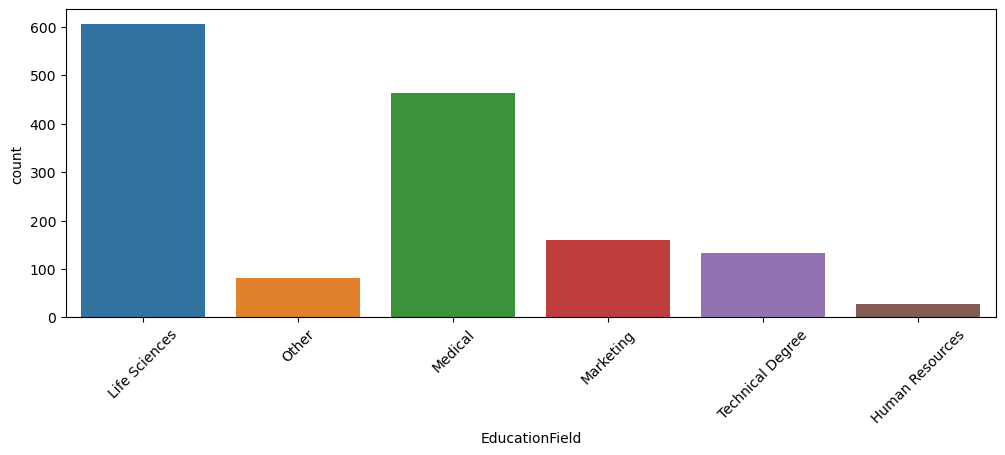

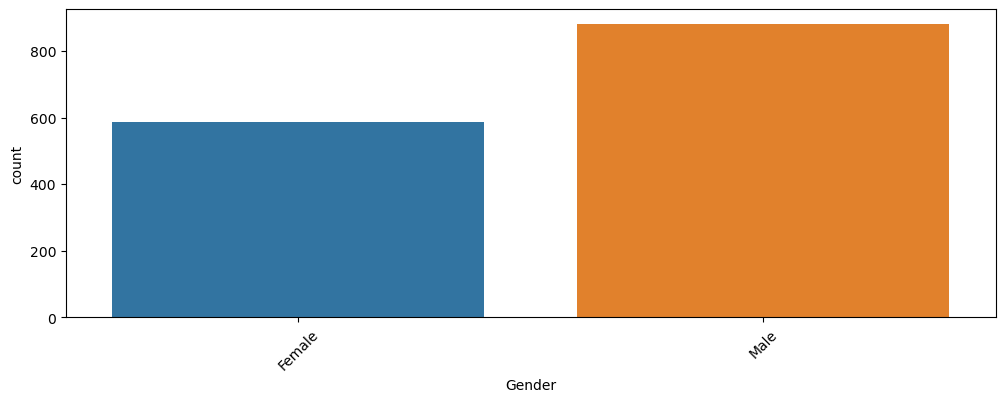

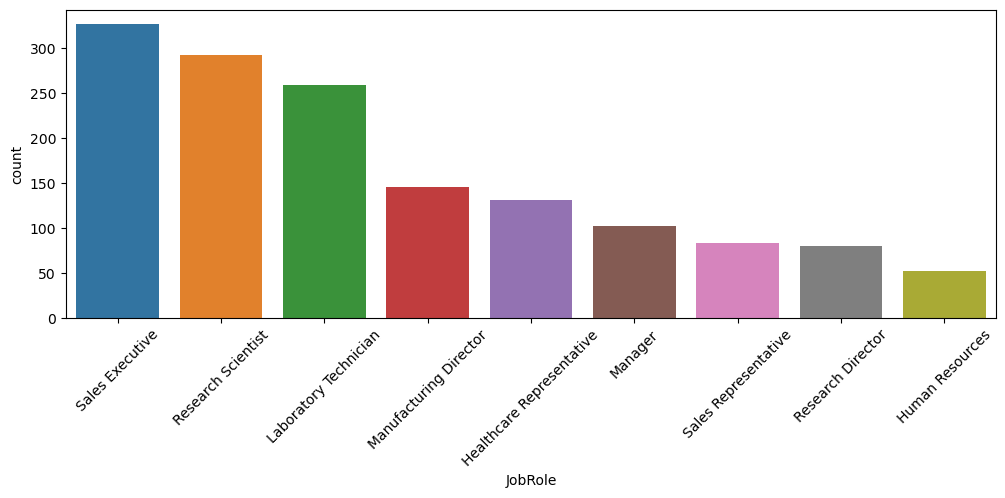

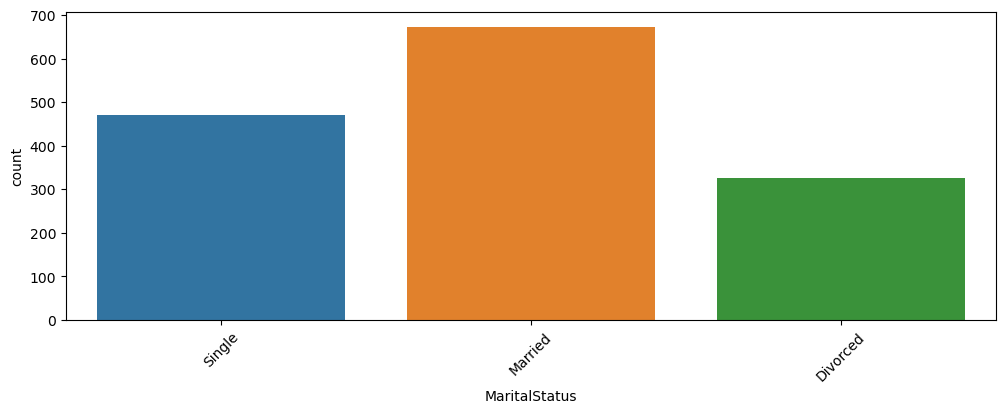

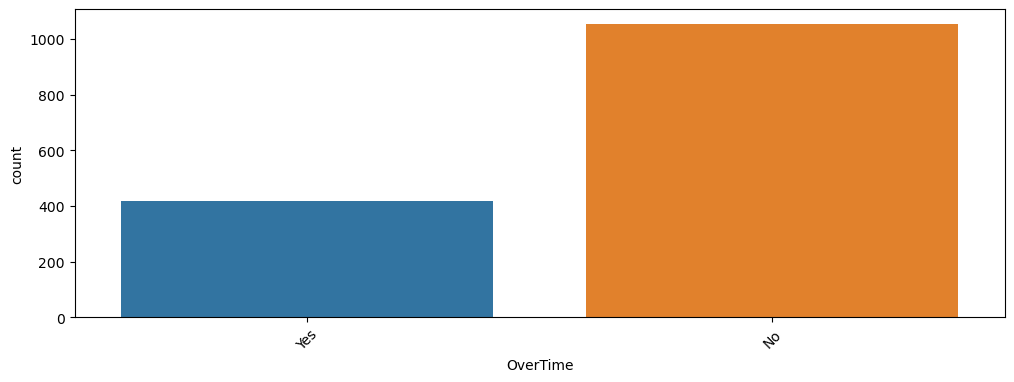

In [534]:
# Count plot for categorical variables

for i in df2[Categorical]:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=i, data=df2)
    plt.xticks(rotation=45)
    plt.show()

### Categorical to numerical transformation: One hot encoding

In [535]:
df_encoded = pd.get_dummies(df2, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime'],drop_first=True)
df_encoded

,Age,Attrition,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,1102,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,No,279,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,Yes,1373,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,No,1392,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,No,591,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,2,2061,3,41,4,2,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,No,613,1,2062,4,42,2,3,1,...,0,0,0,0,0,0,0,1,0,0
1467,27,No,155,3,2064,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,No,1023,3,2065,4,63,2,2,2,...,0,0,0,0,0,1,0,1,0,0


#### Mapping the labels of 'Attrition'

In [536]:
df_encoded['Attrition']=df_encoded['Attrition'].map({'No':0,'Yes':1})

In [537]:
len(df_encoded.columns)

46

In [538]:
df_encoded.shape

(1470, 46)

#### Observation: In the categorical to numerical encoded dataset, there are total 46 columns.Therefore,  22 new columns got created because of one hot encoding of the categorical variables.

### (iii) Correlation Analysis
Compute and visualize pairwise correlations between numerical variables using a correlation matrix or scatter plots.
Identify highly correlated variables (correlation coefficient > 0.7 or < -0.7).

#### Pairwise correlations: Using heat map

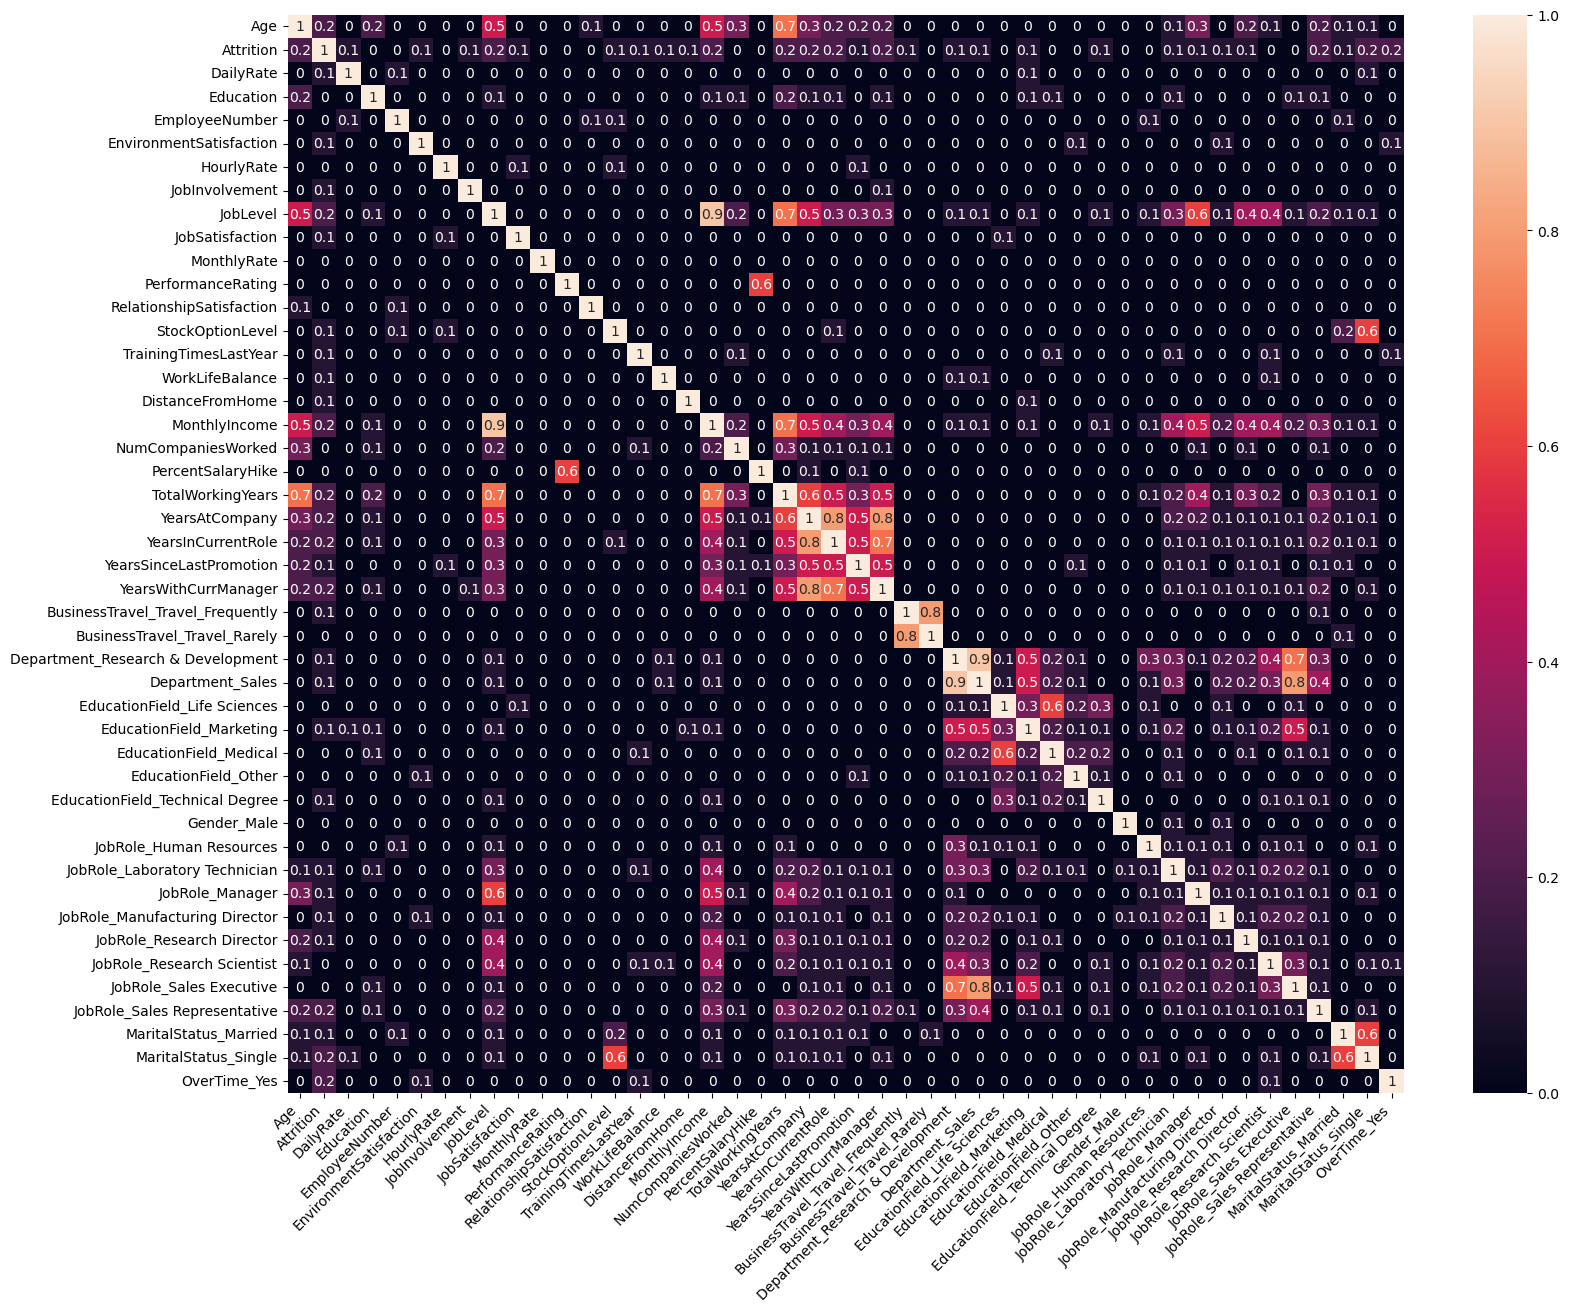

In [539]:
plt.figure(figsize=(18, 14))
heatmap = sns.heatmap(round(abs(df_encoded.corr()), 1), annot=True)
# Tilt x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()

#### Observations: 

####  (i) 'JobLevel' has very high correlation with 'MonthlyIncome' (corr = 0.9) and 'TotalWorkingYears' (corr = 0.7).
#### (ii) 'MonthlyIncome' has high correlation with 'TotalWorkingYears' (corr = 0.7).
#### (iii) 'YearsAtCompany' has high correlation with 'YearsInCurrentRole' (corr = 0.8) and 'YearsWithCurrManager' (corr = 0.8).
#### (iv) 'YearsInCurrentRole' has high correlation with 'YearsWithCurrManager' (corr = 0.7).
#### (v) 'BusinessTravel_Travel_Frequently' is highly correlated with 'BusinessTravel_Travel_Rarely' (corr = 0.8).
#### (vi) 'Department_Research & Development' is highly correlated with 'Department_Sales' (corr = 0.9).
#### (vii) 'JobRole_Sales Executive' is highly correlated with 'Department_Sales' (corr = 0.8).	

### Variance Inflation Factor (VIF): To estimate the extent of multicollinearity

In [540]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_encoded.drop(columns='Attrition',inplace=False)
y=df_encoded['Attrition']
VIF=pd.DataFrame()
VIF["Features"]=X.columns
VIF["VIF value"]=[round(variance_inflation_factor(X.values, i),2) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,Age,36.19
1,DailyRate,5.13
2,Education,9.88
3,EmployeeNumber,4.04
4,EnvironmentSatisfaction,7.44
5,HourlyRate,11.83
6,JobInvolvement,16.20
7,JobLevel,34.03
8,JobSatisfaction,7.31
9,MonthlyRate,5.16


#### Observation: 'MonthlyIncome'(= 6387.71), and 'PercentSalaryHike'(= 6882.61) have very high VIF.

Next: we first drop 'PercentSalaryHike' from the dataframe

### Dropping 'PercentSalaryHike' from the dataframe

In [541]:
df_encoded.drop(columns='PercentSalaryHike',inplace=True)

In [542]:
len(df_encoded.columns)

45

In [543]:
df_encoded.head()

,Age,Attrition,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [544]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_encoded.drop(columns='Attrition',inplace=False)
y=df_encoded['Attrition']
VIF=pd.DataFrame()
VIF["Features"]=X.columns
VIF["VIF value"]=[round(variance_inflation_factor(X.values, i),2) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,Age,35.95
1,DailyRate,5.13
2,Education,9.88
3,EmployeeNumber,4.04
4,EnvironmentSatisfaction,7.41
5,HourlyRate,11.83
6,JobInvolvement,16.14
7,JobLevel,28.74
8,JobSatisfaction,7.30
9,MonthlyRate,5.16


#### Observation: Clearly the VIF has considerably reduced of most of the variables. However, VIF of  'MonthlyIncome' is still very high.
Next: To drop 'MonthlyIncome' from the data frame

### Dropping 'MonthlyIncome' from the dataframe

In [545]:
df_encoded.drop(columns='MonthlyIncome',inplace=True)

In [546]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_encoded.drop(columns='Attrition',inplace=False)
y=df_encoded['Attrition']
VIF=pd.DataFrame()
VIF["Features"]=X.columns
VIF["VIF value"]=[round(variance_inflation_factor(X.values, i),2) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,Age,35.29
1,DailyRate,5.09
2,Education,9.68
3,EmployeeNumber,4.00
4,EnvironmentSatisfaction,7.29
5,HourlyRate,11.58
6,JobInvolvement,15.60
7,JobLevel,26.03
8,JobSatisfaction,7.17
9,MonthlyRate,5.10


#### Observation: Clearly the VIF has considerably reduced of most of the variables. However, VIF of  some variables is still very high.
#### Dropping more variables can lead to significant information loss. Therefore this will be taken care of by regularization during model building.

### (iv) Scaling: Univariate Analysis

In [547]:
df_encoded.describe()

,Age,Attrition,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,9.135373,0.367863,403.509100,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1.000000,1499.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation: 'DailyRate' and 'EmployeeNumber' have different range compared to some other variables.

Next: To scale all the variables within similar range, we will use "Standard Scaler".

In [548]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X1=df_encoded.drop(columns='Attrition',inplace=False)
X2=scale.fit_transform(X1)
X3=pd.DataFrame(X2,columns=X1.columns)
X3.describe()

,Age,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-4.017950e-17,7.197568e-17,2.697011e-16,1.132881e-16,7.054070e-17,1.728021e-16,-6.495182e-18,1.479542e-16,-7.816876e-18,2.394154e-17,...,-9.214096e-17,-3.885781e-16,-1.365499e-16,-1.353792e-16,1.089831e-16,1.616243e-17,-2.308811e-16,1.147986e-16,-3.672044e-16,2.354881e-16
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,...,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-1.736576e+00,-1.868426e+00,-1.701283e+00,-1.575686e+00,-1.766079e+00,-2.432006e+00,-9.614864e-01,-1.567907e+00,-1.717284e+00,...,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-9.189214e-01,-6.855655e-01,-6.282411e-01
25%,-7.581700e-01,-8.366616e-01,-8.916883e-01,-8.866700e-01,-6.605307e-01,-8.803615e-01,-1.026167e+00,-9.614864e-01,-6.608532e-01,-8.806440e-01,...,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-9.189214e-01,-6.855655e-01,-6.282411e-01
50%,-1.011589e-01,-1.204135e-03,8.504925e-02,-7.253514e-03,2.546249e-01,5.355811e-03,3.796721e-01,-5.778755e-02,2.462002e-01,-1.090645e-02,...,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-9.189214e-01,-6.855655e-01,-6.282411e-01
75%,6.653541e-01,8.788772e-01,1.061787e+00,8.821327e-01,1.169781e+00,8.787715e-01,3.796721e-01,8.459113e-01,1.153254e+00,8.641014e-01,...,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,1.088232e+00,1.458650e+00,1.591746e+00
max,2.526886e+00,1.726730e+00,2.038524e+00,1.733302e+00,1.169781e+00,1.678377e+00,1.785511e+00,2.653309e+00,1.153254e+00,1.782888e+00,...,2.162331e+00,3.662208e+00,3.022901e+00,4.168333e+00,2.008543e+00,1.873287e+00,4.087890e+00,1.088232e+00,1.458650e+00,1.591746e+00


#### Observation: All the variables are now scaled within similar range.

### To check class balance

In [555]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

#### Observation: The class "0" ("No") is present in majority .

Next: To balance the classes

### SMOTE: To balance the classes

In [556]:
from imblearn.over_sampling import SMOTE
ST=SMOTE()
X3,y = ST.fit_resample(X3,y)

In [557]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

#### Observation: Clearly, the classes are now balanced.

## Model Building

In [549]:
# Import Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

### Logistic Regression

#### Random state: To find the best one

In [567]:
from sklearn.model_selection import train_test_split
maxAcc=0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=i)
    LR=LogisticRegression()
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Acc=accuracy_score(y_test,y_pred)
    if Acc>maxAcc:
        maxAcc=Acc
        random=i
print(f'Max accuracy: {round(maxAcc,2)}')
print(f'Best_random_state: {random}')

Max accuracy: 0.83
Best_random_state: 138


#### Observation: Random state (in range of 1000) with best accuracy is 138.
#### So, this value of random state will be used in model building.

In [559]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
LR=LogisticRegression()
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.828
Cross validation score: 0.785
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       363
           1       0.82      0.86      0.84       377

    accuracy                           0.83       740
   macro avg       0.83      0.83      0.83       740
weighted avg       0.83      0.83      0.83       740

Confusion matrix:
 [[290  73]
 [ 54 323]]


### Decision Tree Classifier

In [560]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
DT=DecisionTreeClassifier()
model=DT.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.876
Cross validation score: 0.845
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       363
           1       0.88      0.87      0.88       377

    accuracy                           0.88       740
   macro avg       0.88      0.88      0.88       740
weighted avg       0.88      0.88      0.88       740

Confusion matrix:
 [[320  43]
 [ 49 328]]


### Random Forest Classifier

In [562]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
RF=RandomForestClassifier()
model=RF.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.95
Cross validation score: 0.942
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       363
           1       0.99      0.92      0.95       377

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740

Confusion matrix:
 [[358   5]
 [ 32 345]]


### AdaBoost Classifier

In [563]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
AB=AdaBoostClassifier()
model=AB.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(AB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.926
Cross validation score: 0.894
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       363
           1       0.93      0.93      0.93       377

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740

Confusion matrix:
 [[336  27]
 [ 28 349]]


### Gradient Boosting Classifier

In [564]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
GB=GradientBoostingClassifier()
model=GB.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.924
Cross validation score: 0.922
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       363
           1       0.96      0.89      0.92       377

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.93      0.92      0.92       740

Confusion matrix:
 [[348  15]
 [ 41 336]]


### Support Vector Classifier

In [565]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
SV=SVC()
model=SV.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(SV,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.93
Cross validation score: 0.919
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       363
           1       0.92      0.94      0.93       377

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740

Confusion matrix:
 [[333  30]
 [ 22 355]]


### K Neighbors Classifier

In [566]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
KN=KNeighborsClassifier()
model=KN.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.8
Cross validation score: 0.766
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.62      0.75       363
           1       0.73      0.97      0.83       377

    accuracy                           0.80       740
   macro avg       0.84      0.80      0.79       740
weighted avg       0.84      0.80      0.79       740

Confusion matrix:
 [[225 138]
 [ 10 367]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

#### Observation: We observe that among all the classification algorithms "Random forest classifier" has the best accuracy (0.95).
Next, to improve the accuracy of the "Random forest classifier", we will perform hyperparameter tuning using GridSearchCV.

### Hyperparameter tuning of Random Forest Classifier using GridSearchCV
#### Currently used hyperparameters by Random Forest Classifier

In [570]:
print('Parameters currently in use:\n')
GridSearchCV.get_params(RandomForestClassifier())

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [590]:
from sklearn.model_selection import GridSearchCV
RF1=RandomForestClassifier()

hyp={'bootstrap': [True],                # each tree is built using a bootstrap sample of the training data
 'ccp_alpha': [0, 0.01, 0.1, 1.0],       # to control the complexity of the tree by pruning
 'class_weight': [None],                 # set to none as both classes are balanced
 'criterion': ['gini','entropy'],
 'max_depth': [2,6,10,14,18,20,22,24],   # maximum depth of each decision tree in the forest
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],      # minimum impurity decrease required to split a node further
 'min_samples_leaf': [1],
 'min_samples_split': [2,3,5,10],
 'min_weight_fraction_leaf':[0.0],
 'n_estimators': [100,200,300],      # number of base learners (trees) to be included in the ensemble
 'n_jobs': [-1],                     # Utilize all available cores
 'oob_score': [False],               # average of the prediction accuracy on each out-of-bag sample across all trees in the forest.
 'random_state': [random],
 'verbose': [0],
 'warm_start': [True]}                # to reuse the existing solution and continue training an ensemble method from where it left off
grid_search=GridSearchCV(RF1,param_grid=hyp,cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", round(grid_search.best_score_,3))

Best parameters: {'bootstrap': True, 'ccp_alpha': 0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 138, 'verbose': 0, 'warm_start': True}
Best estimators: RandomForestClassifier(ccp_alpha=0, max_depth=20, n_jobs=-1, random_state=138,
                       warm_start=True)
Best score: 0.943


#### Observation: The hypertuned Random Forest Model has poorer accuracy (= 0.94) compared to the default "Random Forest Model" (= 0.95).

#### Therefore, we save the default "Random Forest Model" as the final model.

### Final model: saving "Random Forest Model"

In [593]:
import pickle
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
RF=RandomForestClassifier()
model=RF.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')
file_name='HR Analytics.pkl'
pickle.dump(RF,open(file_name,'wb'))

Accuracy score : 0.95
Cross validation score: 0.937
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       363
           1       0.98      0.92      0.95       377

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740

Confusion matrix:
 [[357   6]
 [ 31 346]]


### Loading the saved model

In [594]:
loaded_model=pickle.load(open('HR Analytics.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(round(result,2))

0.95
